In [1]:
from os import listdir
from os.path import isfile, join
from statistics import fmean

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_dfs = []
file_list = [f for f in listdir("training_output") if isfile(join("training_output", f))]

for i in range(len(file_list)):
    dfs = []
    with open("training_output/" + file_list[i]) as f:
        for line in f.readlines():
            json_data = pd.json_normalize(json.loads(line))
            dfs.append(json_data)
    df = pd.concat(dfs, sort=False)
    df["src"] = file_list[i].replace(".json", "")
    file_dfs.append(df)

df = pd.concat(file_dfs)

In [3]:
df['server_round'] = df['server_round'].astype(int)
df['server_round'] = np.where(df['server_round'] == 20, 0, df['server_round'] )

In [4]:
df[df.server_round == 1].groupby(['src', 'status']).count()

server_round  client_name  \
src                               status                               
client_output_FedCS_cifar10_1000  fail              102          102   
                                  success            98           98   
client_output_PowD_cifar10_1000   fail               38           38   
                                  success            23           23   
client_output_random_cifar10_1000 fail              121          121   
                                  success            79           79   

                                           execution_time  upload_time  \
src                               status                                 
client_output_FedCS_cifar10_1000  fail                102          102   
                                  success              98           98   
client_output_PowD_cifar10_1000   fail                 38           38   
                                  success              23           23   
client_output_random_cifar10_1000 fail                121          121   
                                  success              79           79   

                                           total_time  reason  \
src                               status                        
client_output_FedCS_cifar10_1000  fail            102     102   
                                  success          98       0   
client_output_PowD_cifar10_1000   fail             38      38   
                                  success          23       0   
client_output_random_cifar10_1000 fail            121     121   
                                  success          79       0   

                                           current_timestamp  state.cpu  \
src                               status                                  
client_output_FedCS_cifar10_1000  fail                   102        102   
                                  success                 98         98   
client_output_PowD_cifar10_1000   fail                    38         38   
                                  success                 23         23   
client_output_random_cifar10_1000 fail                   121        121   
                                  success                 79         79   

                                           state.ram  state.network_bandwidth  \
src                               status                                        
client_output_FedCS_cifar10_1000  fail           102                      102   
                                  success         98                       98   
client_output_PowD_cifar10_1000   fail            38                       38   
                                  success         23                       23   
client_output_random_cifar10_1000 fail           121                      121   
                                  success         79                       79   

                                           state.i_reliability  \
src                               status                         
client_output_FedCS_cifar10_1000  fail                     102   
                                  success                   98   
client_output_PowD_cifar10_1000   fail                      38   
                                  success                   23   
client_output_random_cifar10_1000 fail                     121   
                                  success                   79   

                                           state.performance_tier  \
src                               status                            
client_output_FedCS_cifar10_1000  fail                        102   
                                  success                      98   
client_output_PowD_cifar10_1000   fail                         38   
                                  success                      23   
client_output_random_cifar10_1000 fail                        121   
                                  success                      79   

                    

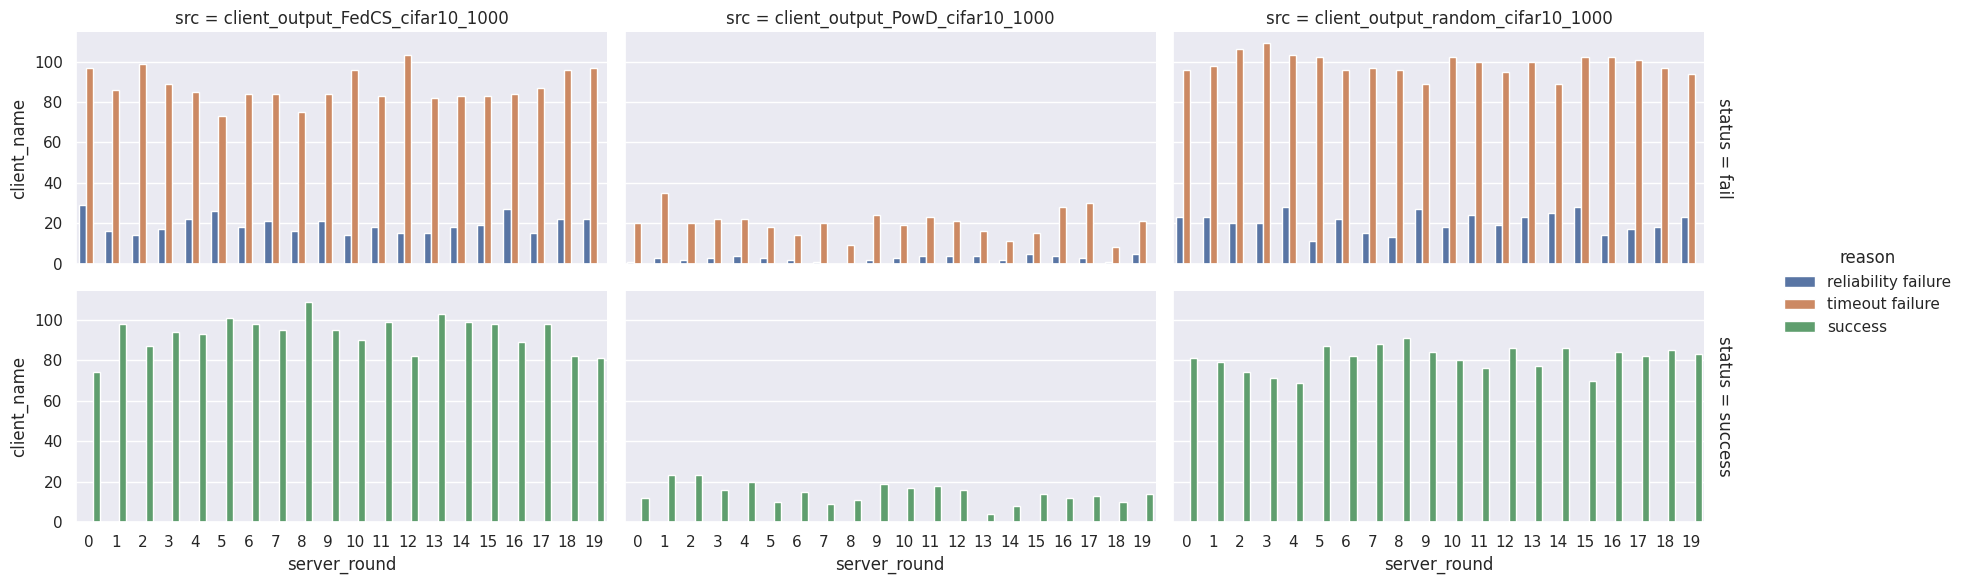

In [5]:
df['reason'].fillna('success', inplace=True)
df_plot = df[['server_round', 'status', 'src', 'client_name', 'reason']].groupby(['server_round', 'status','reason', 'src']).count().reset_index()

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(
    df_plot, x="server_round", y='client_name', row="status", hue="reason", col="src", height=3, aspect=2, kind="bar", margin_titles=True
)

<Axes: xlabel='server_round', ylabel='state.network_bandwidth'>

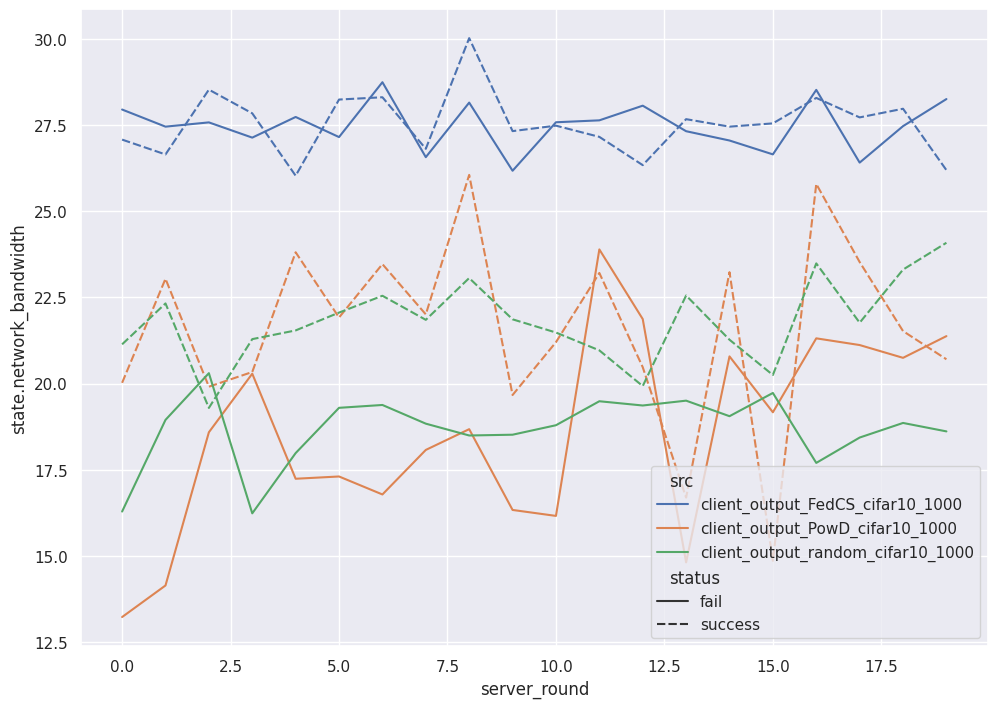

In [6]:
df_plot = df[['server_round', 'status', 'state.network_bandwidth', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()

sns.set_theme(style="darkgrid")
sns.lineplot(data=df_plot, x="server_round", y="state.network_bandwidth", hue="src", style="status")

<Axes: xlabel='server_round', ylabel='state.cpu'>

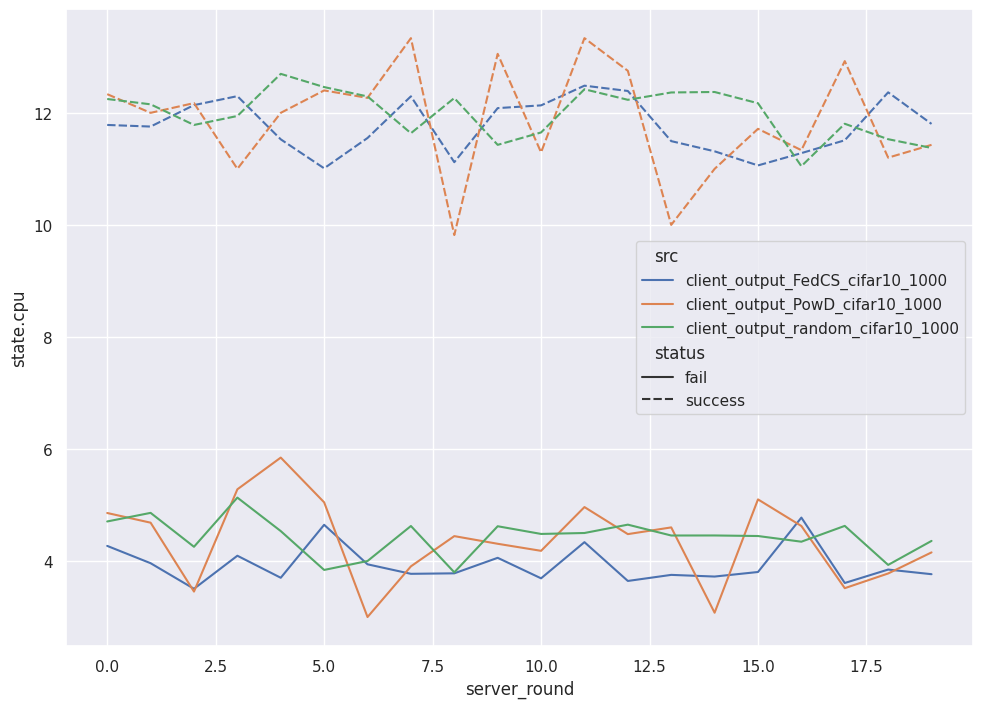

In [7]:
df_plot = df[['server_round', 'status', 'state.cpu', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()

sns.set_theme(style="darkgrid")
sns.lineplot(data=df_plot, x="server_round", y="state.cpu", hue="src", style="status")

<Axes: xlabel='server_round', ylabel='train_output.avg_accuracy'>

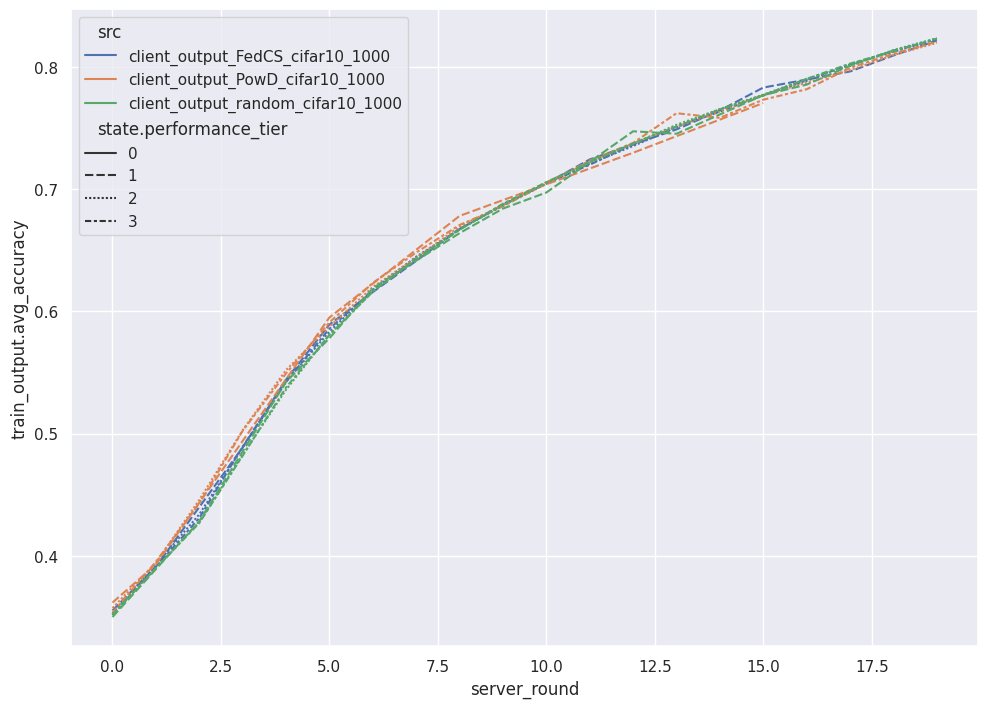

In [8]:
df_temp = df[df.status == 'success']
df_temp['train_output.avg_accuracy'] = df_temp['train_output.accuracy'].apply(lambda x: x[len(x)-1])
df_plot = df_temp[['server_round', 'status', 'train_output.avg_accuracy', 'src','state.performance_tier']].groupby(['server_round', 'state.performance_tier', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="train_output.avg_accuracy", hue="src", style='state.performance_tier')

<Axes: xlabel='server_round', ylabel='train_output.avg_accuracy'>

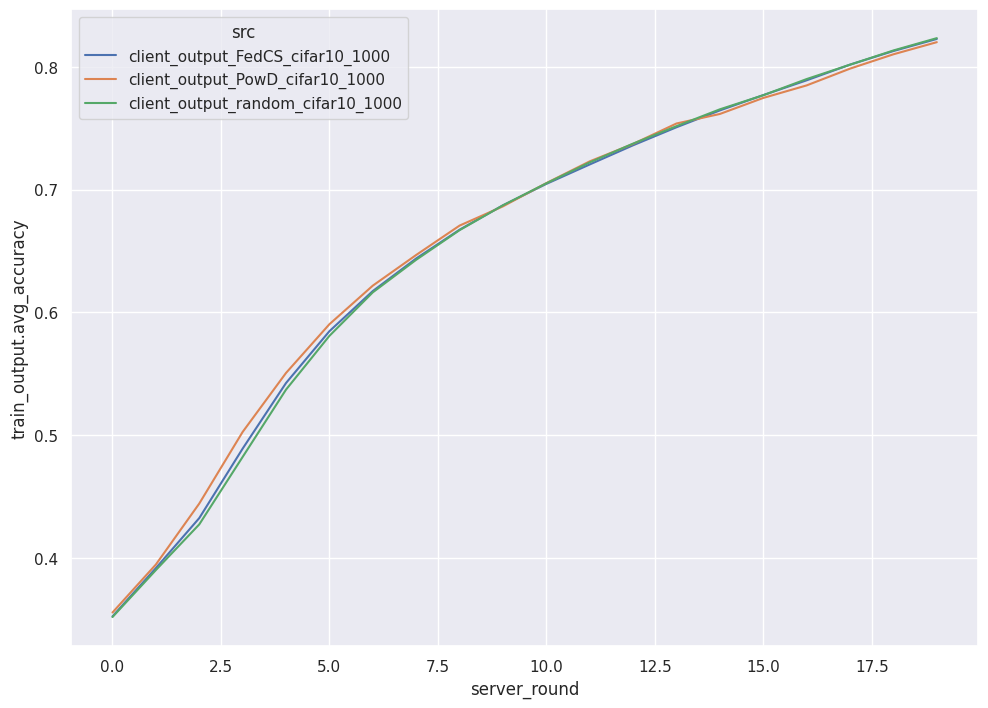

In [9]:
df_temp = df[df.status == 'success']
df_temp['train_output.avg_accuracy'] = df_temp['train_output.accuracy'].apply(lambda x: x[len(x)-1])
df_plot = df_temp[['server_round', 'status', 'train_output.avg_accuracy', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="train_output.avg_accuracy", hue="src")

In [10]:
df_plot

,server_round,status,src,train_output.avg_accuracy
0,0,success,client_output_FedCS_cifar10_1000,0.352338
1,0,success,client_output_PowD_cifar10_1000,0.355491
2,0,success,client_output_random_cifar10_1000,0.351816
3,1,success,client_output_FedCS_cifar10_1000,0.391678
4,1,success,client_output_PowD_cifar10_1000,0.394580
5,1,success,client_output_random_cifar10_1000,0.390065
6,2,success,client_output_FedCS_cifar10_1000,0.432395
7,2,success,client_output_PowD_cifar10_1000,0.444227
8,2,success,client_output_random_cifar10_1000,0.427261
9,3,success,client_output_FedCS_cifar10_1000,0.488989


<Axes: xlabel='server_round', ylabel='execution_time'>

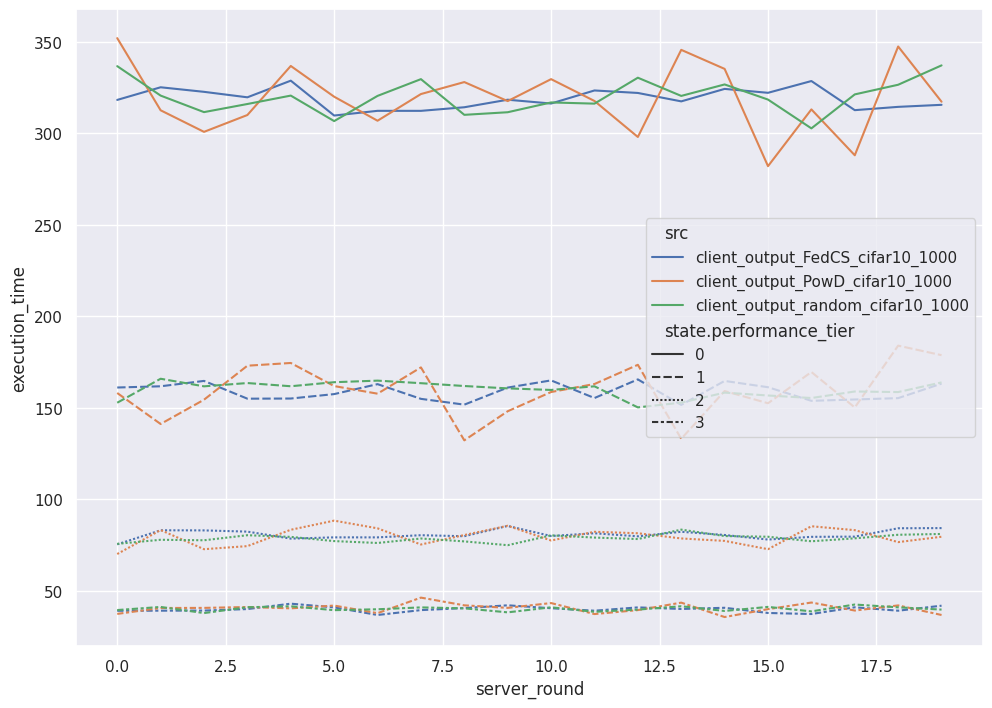

In [11]:
df_temp = df
df_plot = df_temp[['server_round', 'execution_time', 'src','state.performance_tier']].groupby(['server_round', 'state.performance_tier', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="execution_time", hue="src", style='state.performance_tier')

<Axes: xlabel='server_round', ylabel='execution_time'>

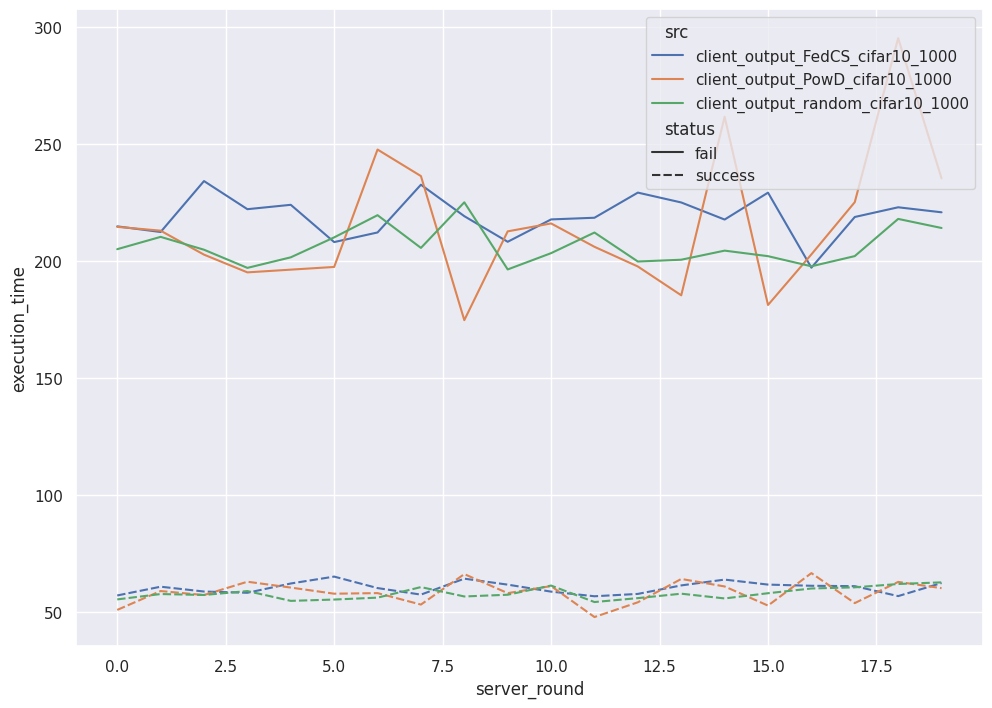

In [12]:
df_temp = df
df_plot = df_temp[['server_round', 'status', 'execution_time', 'upload_time', 'src']].groupby(['server_round', 'status', 'src']).mean().reset_index()
sns.lineplot(data=df_plot, x="server_round", y="execution_time", hue="src", style='status')

<Axes: xlabel='server_round', ylabel='upload_time'>

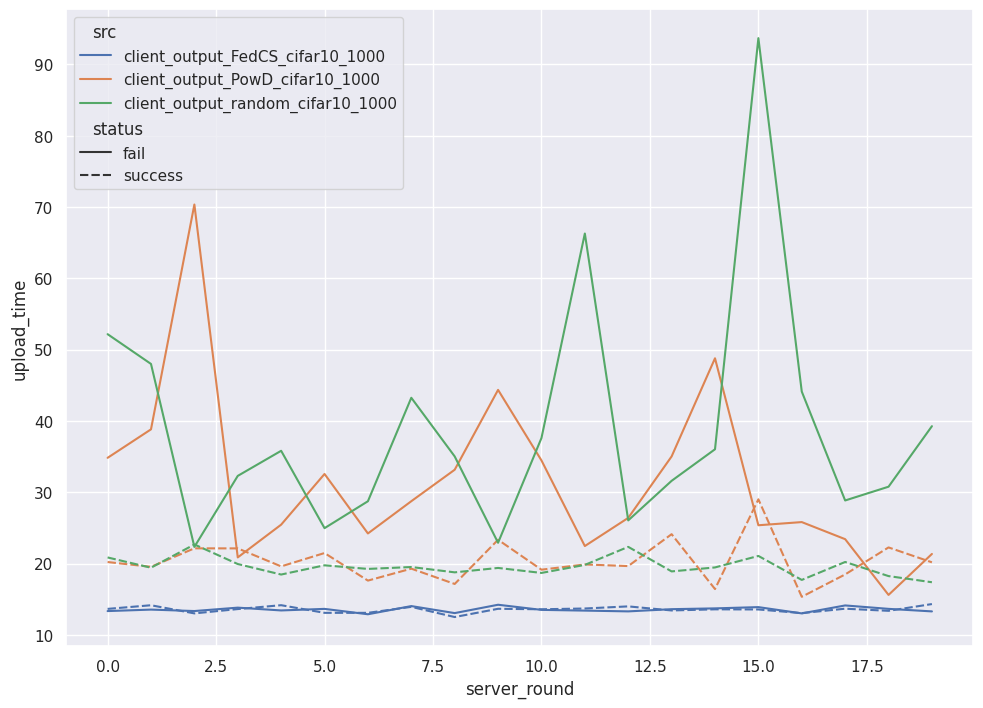

In [13]:
sns.lineplot(data=df_plot, x="server_round", y="upload_time", hue="src", style='status')